<a href="https://colab.research.google.com/github/Avalon-DeNecochea/congressionalNotebook/blob/main/Project_1_partB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Congressional District Analysis : Vehicle Ownership**

Avalon DeNecochea and Fidel Figueroa

In [ ]:
# libraries
url="https://www.forbes.com/wheels/news/what-your-car-might-say-about-how-you-vote/"
import pandas as pd  
import json 
from urllib.request import urlopen 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import numpy as np

##**Hypothesis**

Often times more urban, densely populated districts are primarily Democratic. These types of districts are easier to navigate without a vehicle than suburban or rural areas, it is easier to walk to destinations or use public transportation. At the same time, these districts vote Democratic often. Combined, this could very likely result in many Democratic congressional districts having lower vehicle ownership than Republican congressional districts. 

Generally, Democratic ideas are more environmentally conscious. Also, public transportation is more accepted and supported by Democratic ideals. Combined, we assumed these beliefs could result in owning less vehicles than individuals in Republican congressional districts. 

**We hypothesized people in primarily Republican congressional districts own more vehicles than people in primarily Democratic congressional districts.**


*Data Sources:* 

https://www.pewresearch.org/social-trends/2018/05/22/urban-suburban-and-rural-residents-views-on-key-social-and-political-issues/

https://www.forbes.com/wheels/news/what-your-car-might-say-about-how-you-vote/

In [ ]:
url="https://api.census.gov/data/2021/acs/acs1?get=NAME,B08141_001E,B08141_002E,B08141_003E,B08141_004E,B08141_005E&for=congressional%20district:*&in=state:*"

response = urlopen(url)

data_json = json.loads(response.read())
data_json.pop(0)

cols = ['District Name', 'Total', 'No vehicles', '1 vehicle', '2 vehicles', '3+ vehicles', 'State code', 'district number']

acs_df = pd.DataFrame(data_json, columns = cols)


acs_df[['District', 'State']] = acs_df['District Name'].str.split(',', expand=True)
acs_df['district number'] = pd.to_numeric(acs_df['district number'])

acs_df['State'] = acs_df['State'].str.strip()


acs_df = acs_df[['Total', 'No vehicles', '1 vehicle', '2 vehicles', '3+ vehicles','district number', 'State']]

acs_df.head()

,Total,No vehicles,1 vehicle,2 vehicles,3+ vehicles,district number,State
0,335379,7697,51758,140376,135548,10,Michigan
1,323029,8635,54762,140532,119100,4,Mississippi
2,282576,11946,85961,118294,66375,14,Michigan
3,298007,7774,54217,137693,98323,1,Michigan
4,313144,5985,55632,130877,120650,3,Mississippi


In [ ]:
acs_df['Total'] = pd.to_numeric(acs_df['Total'])
acs_df['No vehicles'] = pd.to_numeric(acs_df['No vehicles'])
acs_df['1 vehicle'] = pd.to_numeric(acs_df['1 vehicle'])
acs_df['2 vehicles'] = pd.to_numeric(acs_df['2 vehicles'])
acs_df['3+ vehicles'] = pd.to_numeric(acs_df['3+ vehicles'])

acs_df['% owning no vehicles'] = (100*acs_df['No vehicles'])/acs_df['Total']
acs_df['% owning 1 vehicle'] = (100*acs_df['1 vehicle'])/acs_df['Total']
acs_df['% owning 2 vehicles'] = (100*acs_df['2 vehicles'])/acs_df['Total']
acs_df['% owning 3+ vehicles'] = (100*acs_df['3+ vehicles'])/acs_df['Total']

acs_df.head()

,Total,No vehicles,1 vehicle,2 vehicles,3+ vehicles,district number,State,% owning no vehicles,% owning 1 vehicle,% owning 2 vehicles,% owning 3+ vehicles
0,335379,7697,51758,140376,135548,10,Michigan,2.295015,15.432690,41.855930,40.416365
1,323029,8635,54762,140532,119100,4,Mississippi,2.673135,16.952658,43.504453,36.869755
2,282576,11946,85961,118294,66375,14,Michigan,4.227535,30.420489,41.862720,23.489256
3,298007,7774,54217,137693,98323,1,Michigan,2.608664,18.193197,46.204619,32.993520
4,313144,5985,55632,130877,120650,3,Mississippi,1.911261,17.765629,41.794510,38.528600


In [ ]:
party_df = pd.read_csv("http://goodcsv.com/wp-content/uploads/2020/08/us-house-of-representatives-2020.csv", encoding = "ISO-8859-1")

party_df['district number'] = party_df['District/Position'].str.extract('(\d+)')
party_df['district number'] = party_df['district number'].fillna(0)
party_df['district number'] = pd.to_numeric(party_df['district number'])
party_df['State'] = party_df['State/Territory']
party_df['State'] = party_df['State'].str.strip()
party_df['Party'] = party_df['Party'].str.strip()

party_df = party_df[['State', 'Party', "district number"]]

party_df.head(5)

,State,Party,district number
0,Louisiana,R,5
1,North Carolina,D,12
2,Alabama,R,4
3,California,D,31
4,Georgia,R,12


In [ ]:
party_df = party_df.loc[party_df['Party'] != "L"]

In [ ]:
merged_df = pd.merge(acs_df, party_df, on=["State", "district number"])

In [ ]:
merged_df.describe()

,Total,No vehicles,1 vehicle,2 vehicles,3+ vehicles,district number,% owning no vehicles,% owning 1 vehicle,% owning 2 vehicles,% owning 3+ vehicles
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,350663.725806,14295.981567,71870.403226,141861.665899,122635.675115,10.175115,4.159343,20.510827,40.251398,35.078432
std,48093.711174,25223.406036,24511.297191,32082.254872,34355.285431,10.663517,7.558053,6.316241,6.097474,9.066966
min,193479.000000,2980.000000,32464.000000,11180.000000,2837.000000,0.000000,0.865165,9.027583,3.676688,0.697869
25%,321257.750000,6595.750000,55498.000000,122891.750000,107119.750000,3.000000,1.915717,16.321611,38.132770,30.872730
50%,349340.000000,8167.000000,65457.000000,141861.000000,124105.500000,6.000000,2.369043,19.065914,41.334882,36.134952
75%,377590.250000,12194.000000,82980.750000,162314.750000,141384.000000,13.000000,3.507093,22.974491,43.722696,40.842289
max,515268.000000,263645.000000,173036.000000,238465.000000,236074.000000,53.000000,65.170121,45.376100,50.069389,58.884783


In [ ]:
merged_df.to_csv("congressional_district_with_parties.csv")

##**Visualizations**


###Percentage owning 3+ vehicles

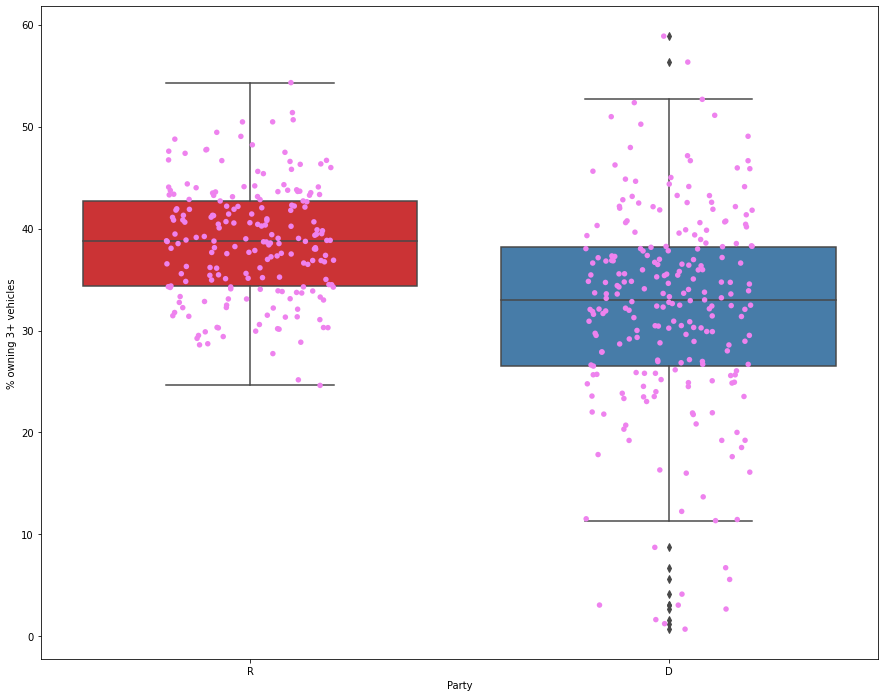

In [ ]:
R = merged_df[merged_df['Party'].str.contains('R')]
D = merged_df[merged_df['Party'].str.contains('D')]

## 3 vehicles
plt.show()
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.boxplot(x='Party', y='% owning 3+ vehicles', data=merged_df, ax=ax,palette="Set1")
ax = sns.stripplot(x='Party', y='% owning 3+ vehicles', data=merged_df, color="violet", jitter=0.2, size=5.5, ax=ax)

This boxplot shows the percentage of owning 3 or more vehicles seperated by party, with conservative being red and liberal being blue.  We can see that liberal districts had more variety when it came to 3+ cars but the average is around 30% while conservatives average is almost at 40% and has less variety. 

###Percentage owning 2 vehicles by party

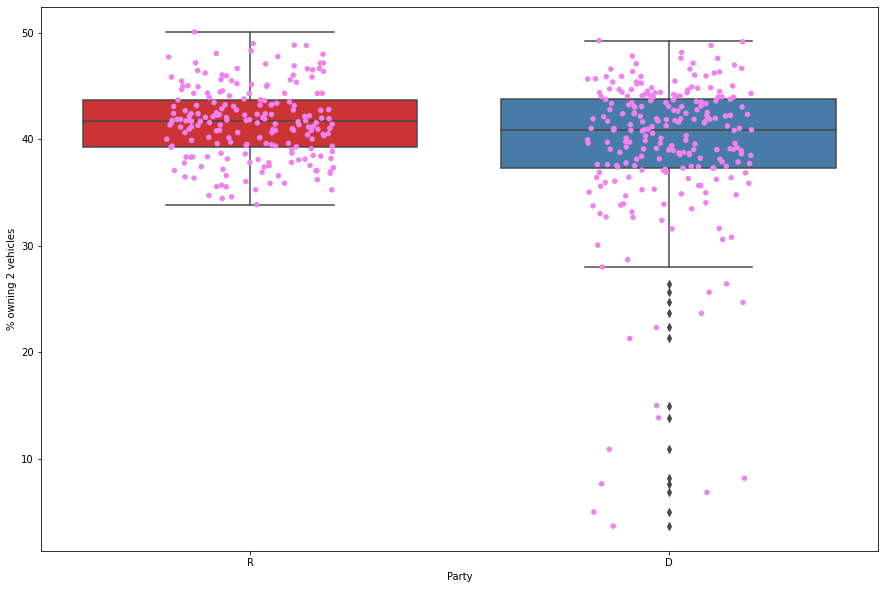

In [ ]:
## 2 vehicles box plot
plt.show()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x='Party', y='% owning 2 vehicles', data=merged_df, ax=ax,palette="Set1")
ax = sns.stripplot(x='Party', y='% owning 2 vehicles', data=merged_df, color="violet", jitter=0.2, size=5.5, ax=ax)

This boxplot shows the percentage of owning 2 vehicles and noticed that both parties seemed to have the same average percentage but could see that liberals had some outliers on the lower perecentage side that we decided to look further into.


###Percentage owning 1 vehicle by party

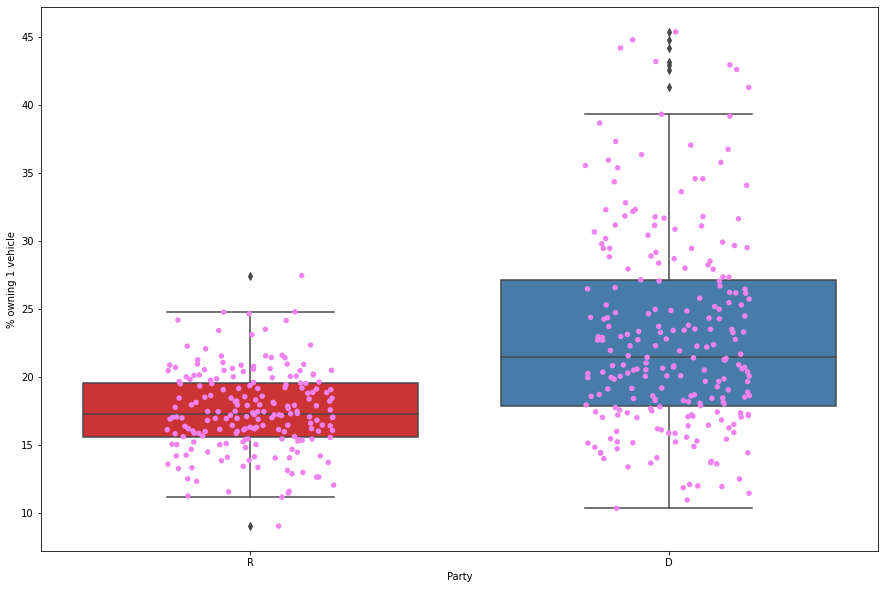

In [ ]:
## box plot
plt.show()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x='Party', y='% owning 1 vehicle', data=merged_df, ax=ax,palette="Set1")
ax = sns.stripplot(x='Party', y='% owning 1 vehicle', data=merged_df, color="violet", jitter=0.2, size=5.5, ax=ax)



This boxplot shows the percentage of owning 1 vehicle and we could see that Liberals have a higher percentage of owning 1 vehicle then conservatives sitting at an average at about 20% while conservaites sit at around 17%.

###Percentage owning no vehicles by party

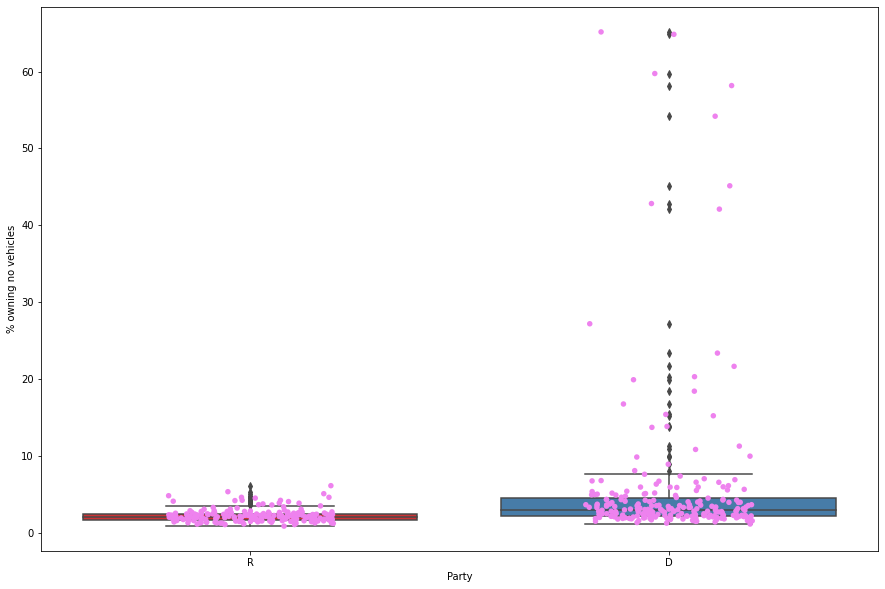

In [ ]:
## box plot
plt.show()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.boxplot(x='Party', y='% owning no vehicles', data=merged_df, ax=ax,palette="Set1")

ax = sns.stripplot(x='Party', y='% owning no vehicles', data=merged_df, color="violet", jitter=0.2, size=5.5, ax=ax)


# show the graph
plt.show()




On this final boxplot we looked at owning no vehicles and noticed that liberals were at a higher percentage, but both are still below 5%.  When looking at this visual we saw some outliars on the liberal side that we wanted to take a closer look at as well. 

##**Investigating outliers**

###No vehicles

In [ ]:
 df_descending = merged_df.sort_values("% owning no vehicles", ascending=False)

desc= df_descending[["Party","% owning no vehicles", "State", "district number"]]

# top 8 
print(desc.head(8))


    Party  % owning no vehicles     State  district number
19      D             65.170121  New York               13
273     D             64.853649  New York               12
17      D             59.753233  New York               10
275     D             58.185560  New York               15
268     D             54.200259  New York                7
16      D             45.145413  New York                9
15      D             42.837537  New York                8
274     D             42.110696  New York               14


All of these 8 outlier districts where the highest percentages of people did not own any vehicles are in New York. This was somewhat expected because these districts are urban and it is common to rely on walking and public transportations in New York City.  

###Two vehicles

In [ ]:
df_ascending = merged_df.sort_values("% owning 2 vehicles", ascending=True)

asc= df_ascending[["Party","% owning 2 vehicles", "State", "district number"]]

# bottom 8 
print(asc.head(8))

    Party  % owning 2 vehicles     State  district number
19      D             3.676688  New York               13
273     D             4.995043  New York               12
17      D             6.837735  New York               10
275     D             7.652281  New York               15
268     D             8.168508  New York                7
16      D            10.893070  New York                9
15      D            13.840481  New York                8
274     D            14.992665  New York               14


The same 8 districts that were outliers for the no vehicle group were also the 8 outliers for the two vehicles group. This emphasizes that these highly populated urban districts have much lower levels of car ownership than other districts. These districts in New York City are all Democratic. 

Based on these findings, we must keep in mind that population and districts in highly urban areas are most likely a confounding factor for political party, because these districts are often Democratic. 

####**New York Congressional District Map**

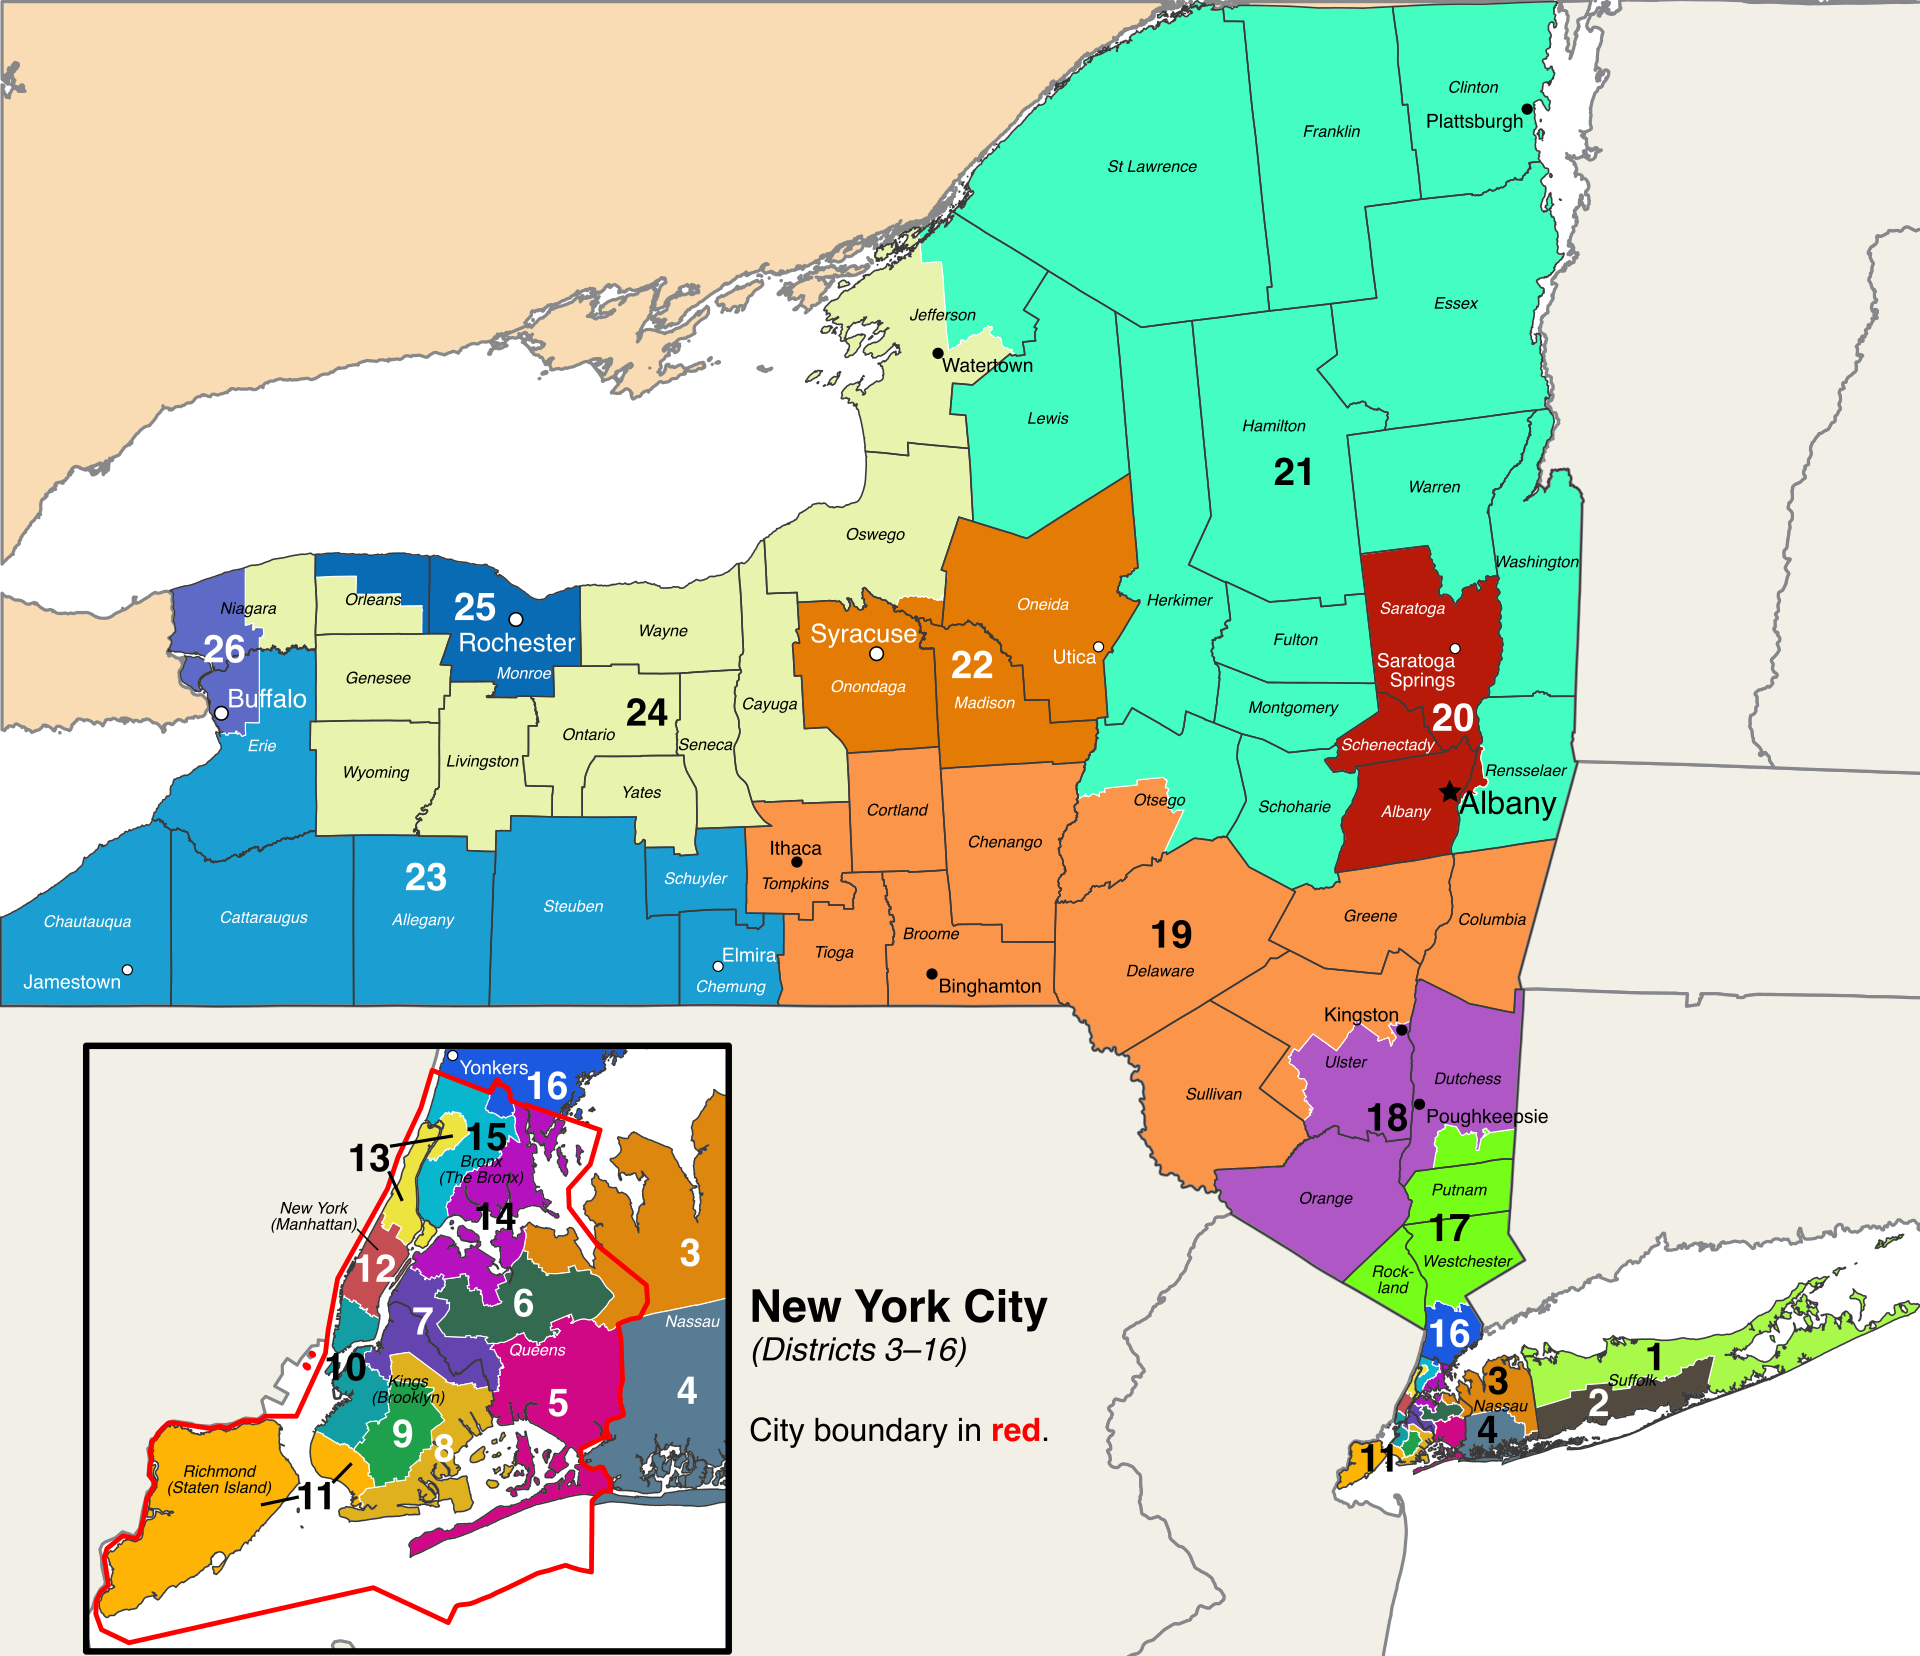

*Source: https://en.wikipedia.org/wiki/New_York%27s_congressional_districts*

##**Statistical Significance**

To further confirm the apparent differences between Republican and Democratic vehicle ownership seen in the boxplots, we conducted two sample t-tests by vehicle group (3+, 2, 1, none). All null hypotheses assume no difference between Democratic and Republican districts grouped by level of vehicle ownership. 

###Three or more vehicles

In [ ]:
# create seperate groups by party
three_df = merged_df[['Party','3+ vehicles']]
three_df.head(10)

Rthree_df = three_df.loc[three_df['Party'] == "R"]

Dthree_df = three_df.loc[three_df['Party'] == "D"]

print(np.var(Rthree_df['3+ vehicles']), np.var(Dthree_df['3+ vehicles']))
#determine variance

#2 sample t test
stats.ttest_ind(a=Rthree_df['3+ vehicles'], b=Dthree_df['3+ vehicles'], equal_var=True)

703345641.3011065 1352518905.3756745


Ttest_indResult(statistic=7.185078592588627, pvalue=2.966855263763793e-12)

We reject the null hypothesis of equality, there is a statistically significant difference in population means between Republican and Democratic districts with ownership of 3 or more vehicles. 

###Two vehicles

In [ ]:
# create seperate groups by party
two_df = merged_df[['Party','2 vehicles']]
two_df.head(10)

Rtwo_df = two_df.loc[two_df['Party'] == "R"]

Dtwo_df = two_df.loc[two_df['Party'] == "D"]

print(np.var(Rtwo_df['2 vehicles']), np.var(Dtwo_df['2 vehicles']))
#determine variance

#2 sample t test
stats.ttest_ind(a=Rtwo_df['2 vehicles'], b=Dtwo_df['2 vehicles'], equal_var=True)

749702352.8655727 1246845559.243788


Ttest_indResult(statistic=2.0918758201845264, pvalue=0.03703290593611917)

Although this is the highest p-value of any of the test groups, we still reject the null hypothesis of equality. There is a statistically significant difference in population means between Democratic and Republican districts grouped by those owning two vehicles. 

###One vehicle

In [ ]:
# create seperate groups by party
one_df = merged_df[['Party','1 vehicle']]
one_df.head(10)

Rone_df = one_df.loc[one_df['Party'] == "R"]

Done_df = one_df.loc[one_df['Party'] == "D"]

print(np.var(Rone_df['1 vehicle']), np.var(Done_df['1 vehicle']))
#determine variance

#2 sample t test
stats.ttest_ind(a=Rone_df['1 vehicle'], b=Done_df['1 vehicle'], equal_var=True)

168752012.9261652 774367563.2867063


Ttest_indResult(statistic=-9.607752505887353, pvalue=6.168806704250599e-20)

Again, the p-value is low and therefore we reject the null hypothesis of no difference between the Democratic and Republican groups owning 1 vehicle. There is a statistically significant difference in the population means. 

### No vehicles

In [ ]:
# create seperate groups by party
zero_df = merged_df[['Party','No vehicles']]
zero_df.head(10)

Rzero_df = zero_df.loc[zero_df['Party'] == "R"]

Dzero_df = zero_df.loc[zero_df['Party'] == "D"]

print(np.var(Rzero_df['No vehicles']), np.var(Dzero_df['No vehicles']))
#determine variance

# 2 sample t test
stats.ttest_ind(a=Rzero_df['No vehicles'], b=Dzero_df['No vehicles'], equal_var=True)

7490393.258236183 1105809517.9830906


Ttest_indResult(statistic=-5.216438098549778, pvalue=2.836088780460048e-07)

The p-value for this 2 sample T-test was very low. Therefore we reject the null hypothesis of equal means and can conclude that the there is a statistically significant difference between population means of Democratic districts and Republican districts owning no vehicles. 

##**Conclusion**

Ultimately, these graphs and statistical tests support our hypothesis that Republicans will own more vehicles than Democrats.


Also, Republican congressional districts were more condensed while Democratic responses were more spread out with their responses.  


After exploring the outliers of the groups owning no vehicles and the groups owning two vehicles, it is clear that heavily populated urban districts may very well be a confounding variable for political party and vehicle ownerhsip.


There is a statistically significant difference between Republican districts and Democratic districts at all levels of vehicle ownership. 


Overall, it is clear that the parties differ in vehicle ownership, with Republican districts generally owning more vehicles. However, it is important to recall that often times urban districts are also Democratic, and are much lower in vehicle ownership overall than other districts. 

*Note:* 

Based on the income analysis, Democratic districts generally have higher incomes than Republican districts. This could lead us to believe that Democratic individuals would also be likely to own more vehicles than Republicans. A possible confounder could be recreational vehicles including ATVs, motorcycles, and motorhomes.